##IMPORT REQUIRED LIBRARIES


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [2]:
data=pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Data Pre Processing**

In [3]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data['target'].unique()

array([0, 1])

target->0 {it indicates there is no problem with hear}
target->1 {it indicates there might be chances of problemwith heart}

In [6]:
data.shape

(1025, 14)

In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data['thalach']

0       168
1       155
2       125
3       161
4       106
       ... 
1020    164
1021    141
1022    118
1023    159
1024    113
Name: thalach, Length: 1025, dtype: int64

In [7]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
data['sex'].dtypes

dtype('int64')

<Axes: xlabel='age'>

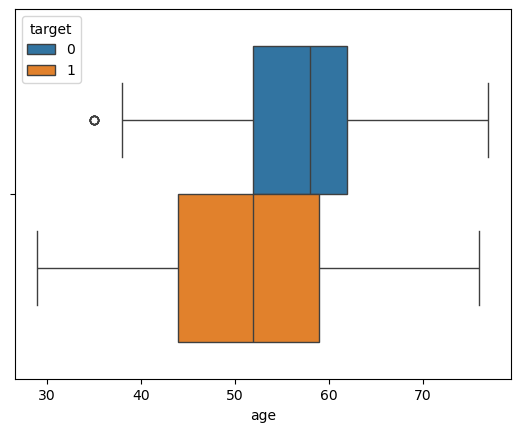

In [ ]:
sns.boxplot(x='age', hue='target', data=data)

**From above boxplot we can see that most number of people who effected with heart abnormalities are segregated around age 50**

<Axes: xlabel='chol'>

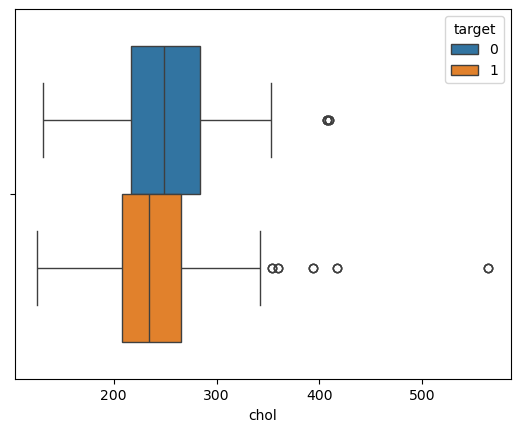

In [ ]:
sns.boxplot(x='chol', hue='target', data=data)

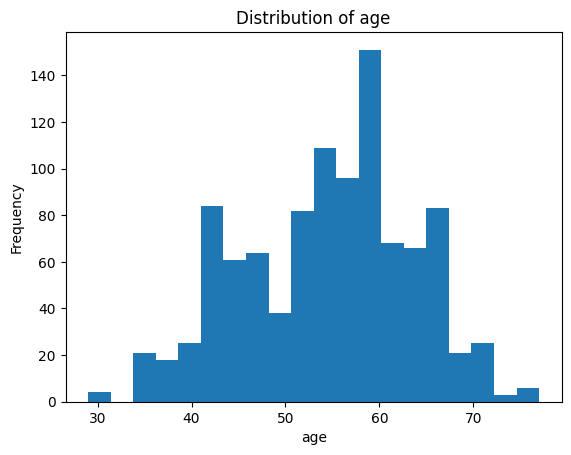

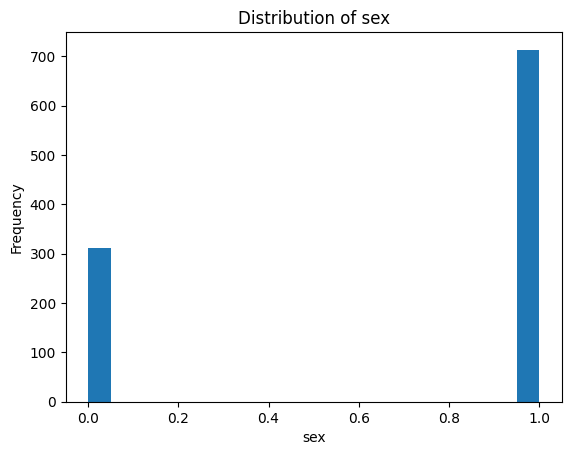

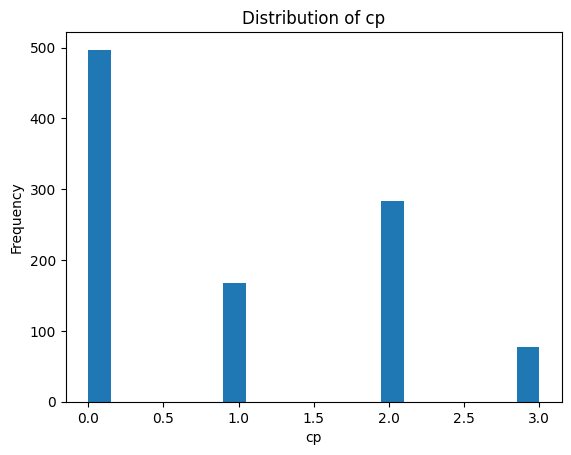

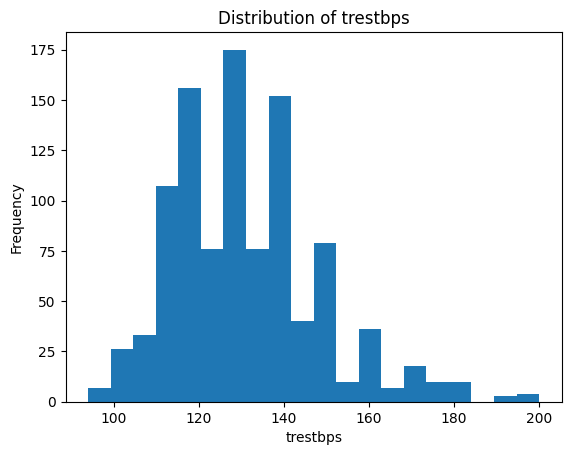

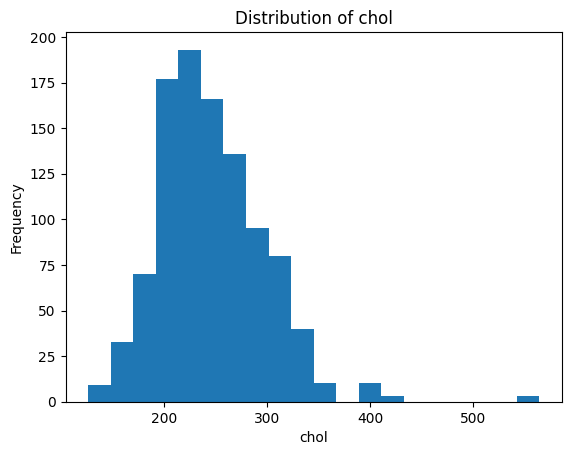

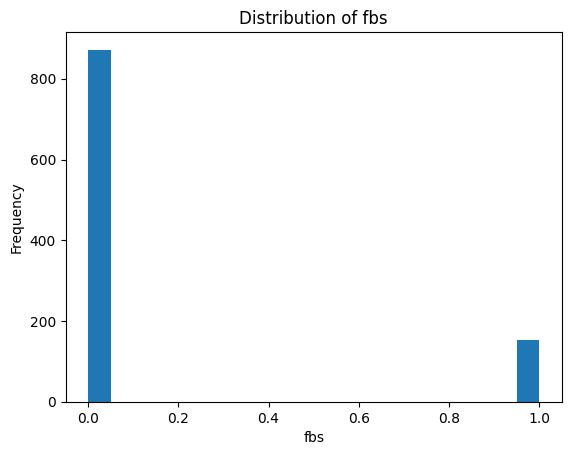

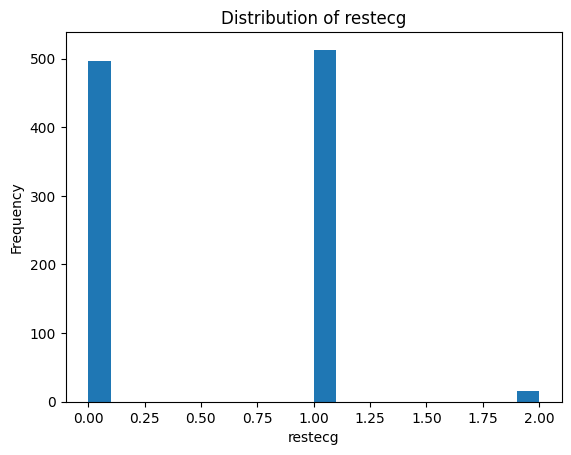

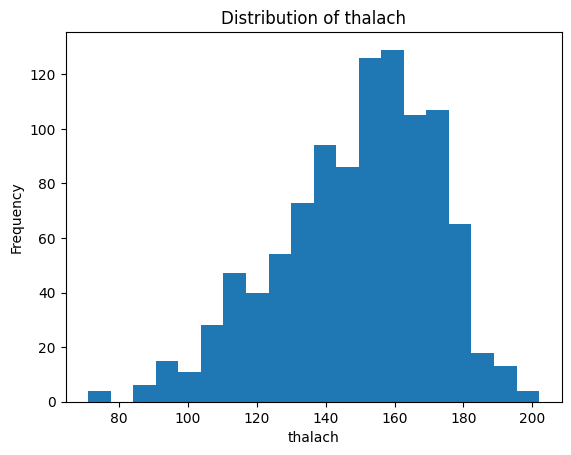

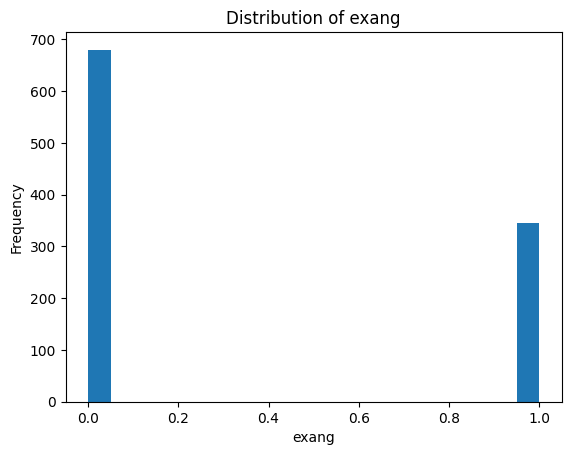

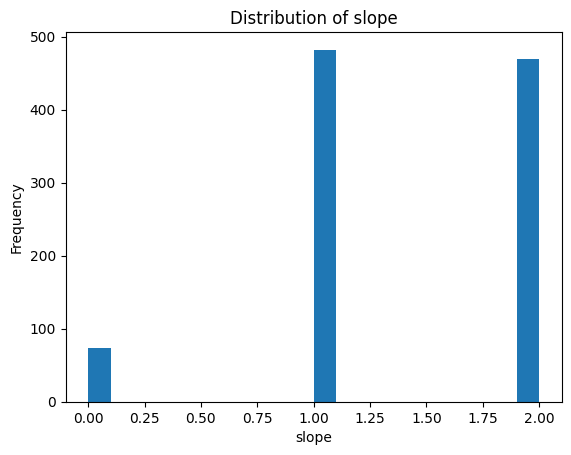

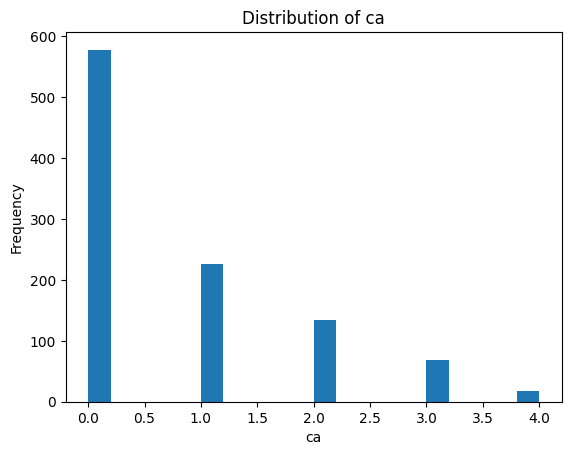

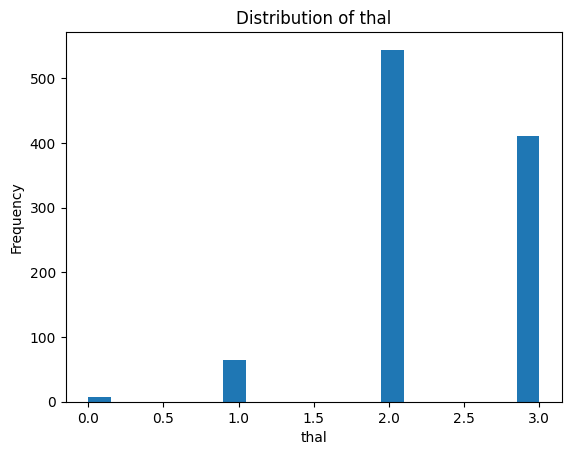

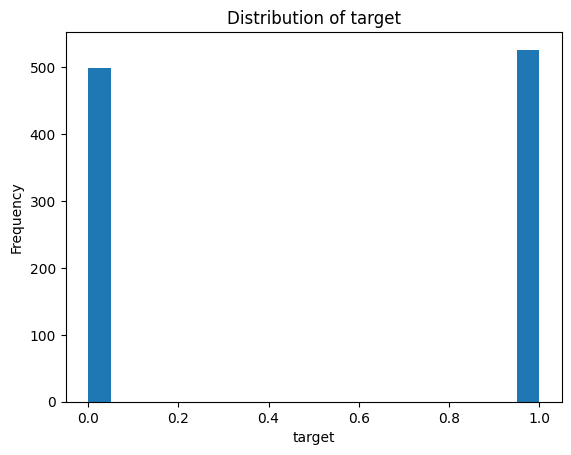

In [8]:
for i in data.columns:
  if data[i].dtypes=='int':
    plt.hist(data[i],bins=20)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
data.value_counts(data['fbs']==0)

,count
fbs,
True,872
False,153


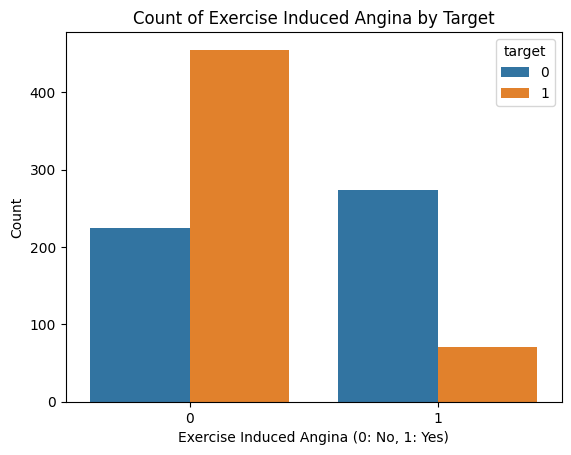

In [10]:
sns.countplot(x='exang', hue='target', data=data)
plt.title('Count of Exercise Induced Angina by Target')
plt.xlabel('Exercise Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

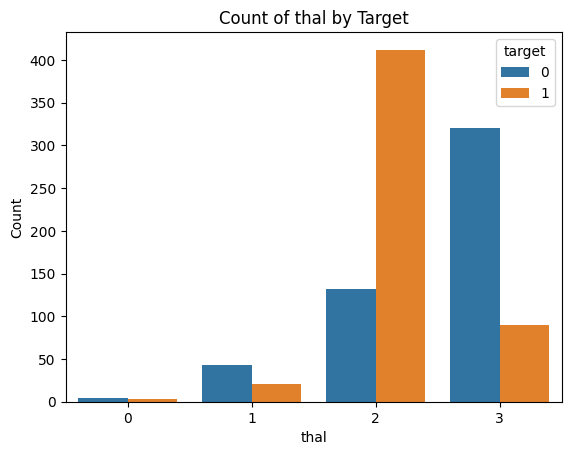

In [11]:
sns.countplot(x='thal', hue='target', data=data)
plt.title('Count of thal by Target')
plt.xlabel('thal')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='thalach', ylabel='Count'>

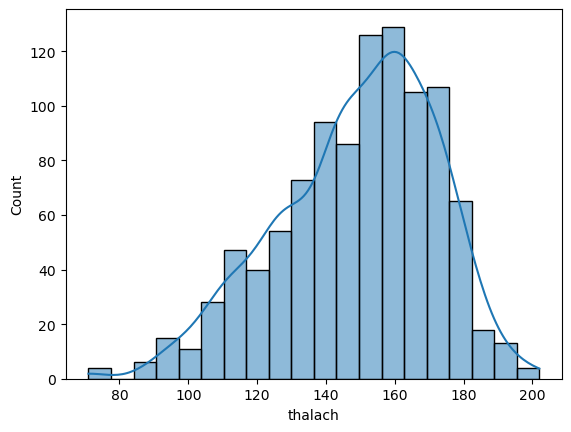

In [ ]:
sns.histplot(data['thalach'], kde=True)

<Axes: xlabel='target', ylabel='thalach'>

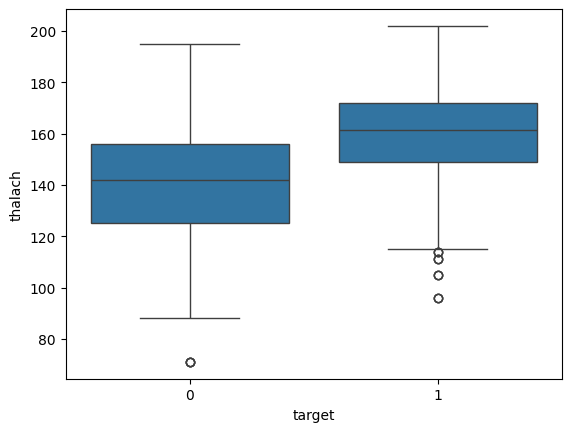

In [12]:
sns.boxplot(x='target', y='thalach', data=data)

<Axes: xlabel='target', ylabel='trestbps'>

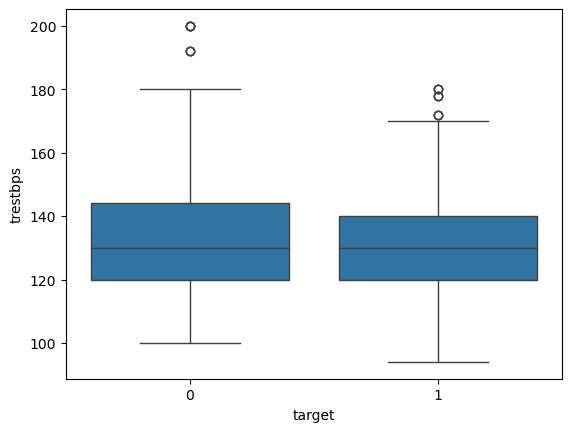

In [ ]:
sns.boxplot(x='target', y='trestbps', data=data)

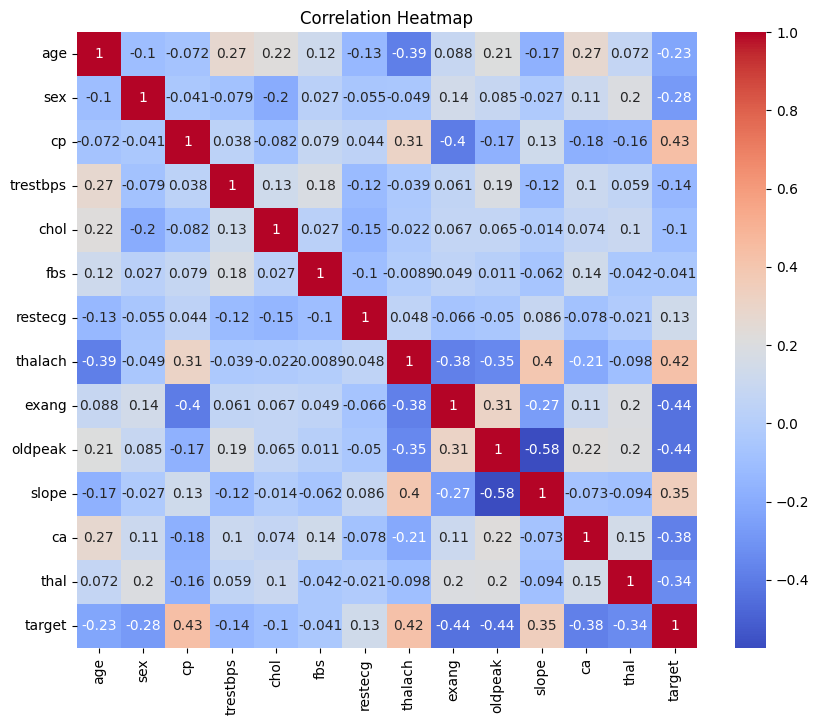

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
x=data.drop('target',axis=1)
y=data['target']

In [19]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=Scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
l_model=LogisticRegression()
l_model.fit(x_train,y_train)

LogisticRegression()

In [22]:
dic={}
dic['logistic']=l_model.score(x_test,y_test)

In [23]:
from sklearn import svm
s_model=svm.SVC()
s_model.fit(x_train,y_train)

SVC()

In [24]:
dic['svm']=s_model.score(x_test,y_test)

In [25]:
dic

{'logistic': 0.7951219512195122, 'svm': 0.8878048780487805}

In [26]:
from sklearn.ensemble import RandomForestClassifier
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
dic['random_forest']=r_model.score(x_test,y_test)

In [28]:
dic

{'logistic': 0.7951219512195122,
 'svm': 0.8878048780487805,
 'random_forest': 0.9853658536585366}

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_logistic = l_model.predict(x_test)
y_pred_svm = s_model.predict(x_test)
y_pred_random_forest = r_model.predict(x_test)


print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))


print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logistic))


print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))


print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_random_forest))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix for Logistic Regression:
[[73 29]
 [13 90]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Confusion Matrix for SVM:
[[85 17]
 [ 6 97]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
          

In [30]:
import joblib
joblib.dump(r_model,'random_forest_model.pkl')
joblib.dump(Scaler,'scaler.pkl')

['scaler.pkl']

In [31]:
model=joblib.load('random_forest_model.pkl')

In [32]:
z=data.iloc[10]
z=z.drop('target')
z=z.values.reshape(1,-1)
scalar=joblib.load('scaler.pkl')

In [33]:
scaled_data=Scaler.transform(z)
prediction=model.predict(scaled_data)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
c=data.iloc[100]
c=c.drop('target')
m=np.array(c)
m


array([4.30e+01, 0.00e+00, 2.00e+00, 1.22e+02, 2.13e+02, 0.00e+00,
       1.00e+00, 1.65e+02, 0.00e+00, 2.00e-01, 1.00e+00, 0.00e+00,
       2.00e+00])

In [35]:
m=m.reshape(1,-1)
scaled_data=scalar.transform(m)
prediction=model.predict(scaled_data)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
c.shape

(1, 14)

In [37]:
for i in range(10):
  d=data.iloc[i]
  d=d.drop('target')
  d=d.values.reshape(1,-1)
  scaled_data=scalar.transform(d)
  prediction=model.predict(scaled_data)
  print(f"The predicted target for the given values is: {prediction[0]}")

The predicted target for the given values is: 0
The predicted target for the given values is: 0
The predicted target for the given values is: 0
The predicted target for the given values is: 0
The predicted target for the given values is: 0
The predicted target for the given values is: 1
The predicted target for the given values is: 0
The predicted target for the given values is: 0
The predicted target for the given values is: 0
The predicted target for the given values is: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut